<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor


drive.mount('/content/drive')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
gws = sqlite3.connect('/content/drive/My Drive/FPL1.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
gws

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected
0,Aaron Cresswell,0,1,0,0,0,0,0,0,0,0,14023
1,Aaron Lennon,1,1,0.9,0,6,0,0,8.2,15,0,13918
2,Aaron Ramsey,2,1,3,0,5,0,0,2.2,60,23,163170
3,Abdoulaye DoucourÈ,0,1,0,0,0,0,0,0,0,0,1051
4,Abdul Rahman Baba,0,1,0,0,0,0,0,0,0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...
67931,Yves Bissouma,2,114,2.4,0,7,0,0,20.4,90,0,1736
67932,Zech Medley,0,114,0,0,0,0,0,0,0,0,5341
67933,Zeze Steven Sessegnon,0,114,0,0,0,0,0,0,0,0,5780
67934,¡lvaro Morata,0,114,0,0,0,0,0,0,0,0,83088


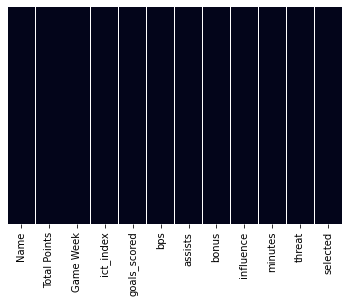

In [3]:
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False)

In [4]:
gws=gws.astype({'Total Points':int,'Game Week':int,'ict_index':float,'goals_scored':int,'bps':float,'assists':int,'bonus':int,'influence':float,'minutes':int,'threat':float,'selected':int})

In [5]:
gws = gws.assign(id=(gws['Name']).astype('category').cat.codes)


In [6]:
gws.head(50)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,0
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,1
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,10
5,Abel Hern·ndez,5,1,5.7,0,10.0,1,0,14.4,90,30.0,26039,11
6,Adama Diomande,8,1,10.7,1,29.0,0,2,45.2,90,45.0,38151,24
7,Adam Clayton,2,1,1.4,0,6.0,0,0,3.2,90,9.0,17663,14
8,Adam Federici,0,1,0.0,0,0.0,0,0,0.0,0,0.0,4315,15
9,Adam Forshaw,1,1,0.3,0,3.0,0,0,2.0,69,0.0,2723,16


In [7]:
gws1=gws.copy()

In [8]:
gws.columns


Index(['Name', 'Total Points', 'Game Week', 'ict_index', 'goals_scored', 'bps',
       'assists', 'bonus', 'influence', 'minutes', 'threat', 'selected', 'id'],
      dtype='object')

In [9]:
#gws1['Total Points'].plot(kind='bar')

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#x = gws1[['Total Points']].values.astype(float)
#scale = MinMaxScaler(feature_range=(0, 1) )

#scalerX = MinMaxScaler()
#scalery = MinMaxScaler()


#x_scaled = scale.fit(x)
#x_scaled=scale.transform(x)
#y = pd.DataFrame(x_scaled)


In [11]:
#gws1['Points']=y
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,0
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,1
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,10


In [12]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift()
gws1['Last_1_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(1)
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(2)
gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(3)
gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(4)
gws1['Last_5_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(5)
gws1['Last_6_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(6)
#gws1['Last_7_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift()
gws1['Last_1_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(1)
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2)
gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3)
gws1['Last_4_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(4)
gws1['Last_5_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(5)
gws1['Last_6_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(6)
#gws1['Last_7_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift()
gws1['Last_1_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(1)
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2)
gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3)
gws1['Last_4_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(4)
gws1['Last_5_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(5)
gws1['Last_6_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(6)
#gws1['Last_7_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift()
gws1['Last_1_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(1)
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2)
gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3)
gws1['Last_4_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(4)
gws1['Last_5_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(5)
gws1['Last_6_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(6)
#gws1['Last_7_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)



gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift()
gws1['Last_1_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(1)
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2)
gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3)
gws1['Last_4_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(4)
gws1['Last_5_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(5)
gws1['Last_6_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(6)
#gws1['Last_7_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)



gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift()
gws1['Last_1_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(1)
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2)
gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3)
gws1['Last_4_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(4)
gws1['Last_5_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(5)
gws1['Last_6_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(6)
#gws1['Last_7_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)



gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift()
gws1['Last_1_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(1)
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2)
gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3)
gws1['Last_4_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(4)
gws1['Last_5_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(5)
gws1['Last_6_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(6)
#gws1['Last_7_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)



gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift()
gws1['Last_1_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(1)
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2)
gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3)
gws1['Last_4_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(4)
gws1['Last_5_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(5)
gws1['Last_6_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(6)
#gws1['Last_7_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)



gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift()
gws1['Last_1_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(1)
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2)
gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3)
gws1['Last_4_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(4)
gws1['Last_5_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(5)
gws1['Last_6_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(6)
#gws1['Last_7_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift()
gws1['Last_1_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(1)
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2)
gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3)
gws1['Last_4_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(4)
gws1['Last_5_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(5)
gws1['Last_6_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(6)
#gws1['Last_7_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)






gws1.head(600)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_4_Week_Points,Last_5_Week_Points,Last_6_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_4_Week_Goals,Last_5_Week_Goals,Last_6_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_4_Week_ICT,Last_5_Week_ICT,Last_6_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_4_Week_BPS,Last_5_Week_BPS,...,Last_2_Week_Assists,Last_3_Week_Assists,Last_4_Week_Assists,Last_5_Week_Assists,Last_6_Week_Assists,Last_Week_Bonus,Last_1_Week_Bonus,Last_2_Week_Bonus,Last_3_Week_Bonus,Last_4_Week_Bonus,Last_5_Week_Bonus,Last_6_Week_Bonus,Last_Week_Influence,Last_1_Week_Influence,Last_2_Week_Influence,Last_3_Week_Influence,Last_4_Week_Influence,Last_5_Week_Influence,Last_6_Week_Influence,Last_Week_Minutes_Played,Last_1_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_3_Week_Minutes_Played,Last_4_Week_Minutes_Played,Last_5_Week_Minutes_Played,Last_6_Week_Minutes_Played,Last_Week_Threat,Last_1_Week_Threat,Last_2_Week_Threat,Last_3_Week_Threat,Last_4_Week_Threat,Last_5_Week_Threat,Last_6_Week_Threat,Last_Week_Selected,Last_1_Week_Selected,Last_2_Week_Selected,Last_3_Week_Selected,Last_4_Week_Selected,Last_5_Week_Selected,Last_6_Week_Selected
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Ben Gibson,6,2,2.0,0,20.0,0,0,19.4,90,0.0,167647,124,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.7,1.7,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.4,10.4,NaN,NaN,NaN,NaN,NaN,90.0,90.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,17473.0,17473.0,NaN,NaN,NaN,NaN,NaN
596,Ben Hamer,0,2,0.0,0,0.0,0,0,0.0,0,0.0,359,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff()
gws1['Last_1_Week_Diff_Points'] = gws1.groupby(['id'])['Last_1_Week_Points'].diff()
gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff()
gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff()
gws1['Last_4_Week_Diff_Points'] = gws1.groupby(['id'])['Last_4_Week_Points'].diff()
gws1['Last_5_Week_Diff_Points'] = gws1.groupby(['id'])['Last_5_Week_Points'].diff()
gws1['Last_6_Week_Diff_Points'] = gws1.groupby(['id'])['Last_6_Week_Points'].diff()
#gws1['Last_7_Week_Diff_Points'] = gws1.groupby(['id'])['Last_7_Week_Points'].diff()



gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff()
gws1['Last_1_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_1_Week_Goals'].diff()
gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff()
gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff()
gws1['Last_4_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_4_Week_Goals'].diff()
gws1['Last_5_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_5_Week_Goals'].diff()
gws1['Last_6_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_6_Week_Goals'].diff()
#gws1['Last_7_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_7_Week_Goals'].diff()


gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff()
gws1['Last_Week_1_Diff_ICT'] = gws1.groupby(['id'])['Last_1_Week_ICT'].diff()
gws1['Last_Week_2_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff()
gws1['Last_Week_3_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff()
gws1['Last_Week_4_Diff_ICT'] = gws1.groupby(['id'])['Last_4_Week_ICT'].diff()
gws1['Last_Week_5_Diff_ICT'] = gws1.groupby(['id'])['Last_5_Week_ICT'].diff()
gws1['Last_Week_6_Diff_ICT'] = gws1.groupby(['id'])['Last_6_Week_ICT'].diff()
#gws1['Last_Week_7_Diff_ICT'] = gws1.groupby(['id'])['Last_7_Week_ICT'].diff()


gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff()
gws1['Last_Week_1_Diff_BPS'] = gws1.groupby(['id'])['Last_1_Week_BPS'].diff()
gws1['Last_Week_2_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff()
gws1['Last_Week_3_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff()
gws1['Last_Week_4_Diff_BPS'] = gws1.groupby(['id'])['Last_4_Week_BPS'].diff()
gws1['Last_Week_5_Diff_BPS'] = gws1.groupby(['id'])['Last_5_Week_BPS'].diff()
gws1['Last_Week_6_Diff_BPS'] = gws1.groupby(['id'])['Last_6_Week_BPS'].diff()
#gws1['Last_Week_7_Diff_BPS'] = gws1.groupby(['id'])['Last_7_Week_BPS'].diff()


gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff()
gws1['Last_Week_1_Diff_Assists'] = gws1.groupby(['id'])['Last_1_Week_Assists'].diff()
gws1['Last_Week_2_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff()
gws1['Last_Week_3_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff()
gws1['Last_Week_4_Diff_Assists'] = gws1.groupby(['id'])['Last_4_Week_Assists'].diff()
gws1['Last_Week_5_Diff_Assists'] = gws1.groupby(['id'])['Last_5_Week_Assists'].diff()
gws1['Last_Week_6_Diff_Assists'] = gws1.groupby(['id'])['Last_6_Week_Assists'].diff()
#gws1['Last_Week_7_Diff_Assists'] = gws1.groupby(['id'])['Last_7_Week_Assists'].diff()


gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff()
gws1['Last_Week_1_Diff_Bonus'] = gws1.groupby(['id'])['Last_1_Week_Bonus'].diff()
gws1['Last_Week_2_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff()
gws1['Last_Week_3_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff()
gws1['Last_Week_4_Diff_Bonus'] = gws1.groupby(['id'])['Last_4_Week_Bonus'].diff()
gws1['Last_Week_5_Diff_Bonus'] = gws1.groupby(['id'])['Last_5_Week_Bonus'].diff()
gws1['Last_Week_6_Diff_Bonus'] = gws1.groupby(['id'])['Last_6_Week_Bonus'].diff()
#gws1['Last_Week_7_Diff_Bonus'] = gws1.groupby(['id'])['Last_7_Week_Bonus'].diff()


gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff()
gws1['Last_Week_1_Diff_Influence'] = gws1.groupby(['id'])['Last_1_Week_Influence'].diff()
gws1['Last_Week_2_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff()
gws1['Last_Week_3_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff()
gws1['Last_Week_4_Diff_Influence'] = gws1.groupby(['id'])['Last_4_Week_Influence'].diff()
gws1['Last_Week_5_Diff_Influence'] = gws1.groupby(['id'])['Last_5_Week_Influence'].diff()
gws1['Last_Week_6_Diff_Influence'] = gws1.groupby(['id'])['Last_6_Week_Influence'].diff()
#gws1['Last_Week_7_Diff_Influence'] = gws1.groupby(['id'])['Last_7_Week_Influence'].diff()


gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff()
gws1['Last_Week_1_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_1_Week_Minutes_Played'].diff()
gws1['Last_Week_2_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff()
gws1['Last_Week_3_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff()
gws1['Last_Week_4_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_4_Week_Minutes_Played'].diff()
gws1['Last_Week_5_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_5_Week_Minutes_Played'].diff()
gws1['Last_Week_6_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_6_Week_Minutes_Played'].diff()
#gws1['Last_Week_7_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_7_Week_Minutes_Played'].diff()


gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff()
gws1['Last_Week_1_Diff_Threat'] = gws1.groupby(['id'])['Last_1_Week_Threat'].diff()
gws1['Last_Week_2_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff()
gws1['Last_Week_3_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff()
gws1['Last_Week_4_Diff_Threat'] = gws1.groupby(['id'])['Last_4_Week_Threat'].diff()
gws1['Last_Week_5_Diff_Threat'] = gws1.groupby(['id'])['Last_5_Week_Threat'].diff()
gws1['Last_Week_6_Diff_Threat'] = gws1.groupby(['id'])['Last_6_Week_Threat'].diff()
#gws1['Last_Week_7_Diff_Threat'] = gws1.groupby(['id'])['Last_7_Week_Threat'].diff()

gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff()
gws1['Last_Week_1_Diff_Selected'] = gws1.groupby(['id'])['Last_1_Week_Selected'].diff()
gws1['Last_Week_2_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff()
gws1['Last_Week_3_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff()
gws1['Last_Week_4_Diff_Selected'] = gws1.groupby(['id'])['Last_4_Week_Selected'].diff()
gws1['Last_Week_5_Diff_Selected'] = gws1.groupby(['id'])['Last_5_Week_Selected'].diff()
gws1['Last_Week_6_Diff_Selected'] = gws1.groupby(['id'])['Last_6_Week_Selected'].diff()
#gws1['Last_Week_7_Diff_Selected'] = gws1.groupby(['id'])['Last_7_Week_Selected'].diff()



In [14]:
#gws1['rolling_mean'] = gws1['Total Points'].rolling(window=7).mean()
gws1['Rolling Mean Points'] = gws1['Total Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points 1']=gws1['Last_Week_Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points 2']=gws1['Last_1_Week_Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points 3']=gws1['Last_2_Week_Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points diff'] = gws1['Last_Week_Diff_Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points diff 1'] = gws1['Last_1_Week_Diff_Points'].rolling(window=2).mean()
#gws1['Rolling Mean Points diff 2'] = gws1['Last_2_Week_Diff_Points'].rolling(window=2).mean()



gws1['Rolling Mean Goals'] = gws1['goals_scored'].rolling(window=2).mean()
gws1['Rolling Mean ICT'] = gws1['ict_index'].rolling(window=2).mean()
gws1['Rolling Mean Influence'] = gws1['influence'].rolling(window=2).mean()
gws1['Rolling Mean Threat'] = gws1['threat'].rolling(window=2).mean()
gws1['Rolling Mean Assists'] = gws1['assists'].rolling(window=2).mean()
gws1['Rolling Mean BPS'] = gws1['bps'].rolling(window=2).mean()
gws1['Rolling Mean Minutes'] = gws1['minutes'].rolling(window=2).mean()
gws1['Rolling Mean Bonus'] = gws1['bonus'].rolling(window=2).mean()
gws1['Rolling Mean Selected'] = gws1['selected'].rolling(window=2).mean()



#gws1.drop(['ROlling Mean Point Diff'],axis=1,inplace=True)

gws1.head()

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_4_Week_Points,Last_5_Week_Points,Last_6_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_4_Week_Goals,Last_5_Week_Goals,Last_6_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_4_Week_ICT,Last_5_Week_ICT,Last_6_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_4_Week_BPS,Last_5_Week_BPS,...,Last_Week_5_Diff_Bonus,Last_Week_6_Diff_Bonus,Last_Week_Diff_Influence,Last_Week_1_Diff_Influence,Last_Week_2_Diff_Influence,Last_Week_3_Diff_Influence,Last_Week_4_Diff_Influence,Last_Week_5_Diff_Influence,Last_Week_6_Diff_Influence,Last_Week_Diff_Minutes_Played,Last_Week_1_Diff_Minutes_Played,Last_Week_2_Diff_Minutes_Played,Last_Week_3_Diff_Minutes_Played,Last_Week_4_Diff_Minutes_Played,Last_Week_5_Diff_Minutes_Played,Last_Week_6_Diff_Minutes_Played,Last_Week_Diff_Threat,Last_Week_1_Diff_Threat,Last_Week_2_Diff_Threat,Last_Week_3_Diff_Threat,Last_Week_4_Diff_Threat,Last_Week_5_Diff_Threat,Last_Week_6_Diff_Threat,Last_Week_Diff_Selected,Last_Week_1_Diff_Selected,Last_Week_2_Diff_Selected,Last_Week_3_Diff_Selected,Last_Week_4_Diff_Selected,Last_Week_5_Diff_Selected,Last_Week_6_Diff_Selected,Rolling Mean Points,Rolling Mean Goals,Rolling Mean ICT,Rolling Mean Influence,Rolling Mean Threat,Rolling Mean Assists,Rolling Mean BPS,Rolling Mean Minutes,Rolling Mean Bonus,Rolling Mean Selected
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,0.45,4.1,0.0,0.0,3.0,7.5,0.0,13970.5
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,0.0,1.95,5.2,11.5,0.0,5.5,37.5,0.0,88544.0
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.50,1.1,11.5,0.0,2.5,30.0,0.0,82110.5
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1147.0


In [15]:
gws1=gws1.dropna()
#gws1.drop('Total Points',axis=1, inplace=True)


In [16]:
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_4_Week_Points,Last_5_Week_Points,Last_6_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_4_Week_Goals,Last_5_Week_Goals,Last_6_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_4_Week_ICT,Last_5_Week_ICT,Last_6_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_4_Week_BPS,Last_5_Week_BPS,...,Last_Week_5_Diff_Bonus,Last_Week_6_Diff_Bonus,Last_Week_Diff_Influence,Last_Week_1_Diff_Influence,Last_Week_2_Diff_Influence,Last_Week_3_Diff_Influence,Last_Week_4_Diff_Influence,Last_Week_5_Diff_Influence,Last_Week_6_Diff_Influence,Last_Week_Diff_Minutes_Played,Last_Week_1_Diff_Minutes_Played,Last_Week_2_Diff_Minutes_Played,Last_Week_3_Diff_Minutes_Played,Last_Week_4_Diff_Minutes_Played,Last_Week_5_Diff_Minutes_Played,Last_Week_6_Diff_Minutes_Played,Last_Week_Diff_Threat,Last_Week_1_Diff_Threat,Last_Week_2_Diff_Threat,Last_Week_3_Diff_Threat,Last_Week_4_Diff_Threat,Last_Week_5_Diff_Threat,Last_Week_6_Diff_Threat,Last_Week_Diff_Selected,Last_Week_1_Diff_Selected,Last_Week_2_Diff_Selected,Last_Week_3_Diff_Selected,Last_Week_4_Diff_Selected,Last_Week_5_Diff_Selected,Last_Week_6_Diff_Selected,Rolling Mean Points,Rolling Mean Goals,Rolling Mean ICT,Rolling Mean Influence,Rolling Mean Threat,Rolling Mean Assists,Rolling Mean BPS,Rolling Mean Minutes,Rolling Mean Bonus,Rolling Mean Selected
4141,Aaron Cresswell,6,8,3.3,0,17.0,0,0,8.2,90,18.0,16068,0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,3.3,0.0,1.8,1.3,2.0,1.3,12.0,12.0,0.0,7.0,13.0,13.0,...,0.0,0.0,26.6,26.6,-10.0,1.6,-6.0,9.0,5.4,90.0,90.0,-90.0,0.0,0.0,0.0,90.0,1.0,1.0,-6.0,4.0,-2.0,4.0,0.0,-1163.0,-1163.0,-1609.0,-94.0,1183.0,2366.0,-1385.0,3.0,0.0,1.650000e+00,4.1,9.0,0.0,8.5,45.0,0.0,282343.0
4142,Aaron Lennon,2,8,1.9,0,6.0,0,0,0.0,67,18.0,7542,1,4.0,4.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3,5.3,0.0,2.4,0.6,0.7,0.4,18.0,18.0,0.0,13.0,6.0,6.0,...,0.0,0.0,24.4,24.4,-8.4,8.4,-5.6,2.4,-5.0,8.0,8.0,-64.0,-1.0,34.0,27.0,-11.0,0.0,0.0,-2.0,-2.0,4.0,0.0,0.0,-31.0,-31.0,-2.0,-9.0,-50.0,-108.0,-6259.0,4.0,0.0,2.600000e+00,4.1,18.0,0.0,11.5,78.5,0.0,11805.0
4143,Aaron Ramsey,0,8,0.0,0,0.0,0,0,0.0,0,0.0,40594,4,0.0,0.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,5.1,1.1,0.5,4.8,0.0,0.0,0.0,7.0,-1.0,2.0,...,0.0,0.0,-8.8,-8.8,5.8,2.6,0.4,-16.0,13.8,-25.0,-25.0,9.0,-74.0,64.0,12.0,-46.0,-38.0,-38.0,12.0,24.0,-2.0,-6.0,-13.0,-658.0,-658.0,-117.0,862.0,-4.0,2288.0,-123444.0,1.0,0.0,9.500000e-01,0.0,9.0,0.0,3.0,33.5,0.0,24068.0
4145,Abdoulaye DoucourÈ,0,8,0.0,0,0.0,0,0,0.0,0,0.0,667,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,-4.0,-1.0,-20.0,-366.0,0.0,0.0,1.221245e-14,0.0,0.0,0.0,0.0,0.0,0.0,333.5
4146,Abdul Rahman Baba,0,8,0.0,0,0.0,0,0,0.0,0,0.0,1087,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,29.0,38.0,31.0,57.0,25.0,-363.0,0.0,0.0,1.221245e-14,0.0,0.0,0.0,0.0,0.0,0.0,877.0


In [17]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
X=gws1.drop(['Name','Total Points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat'],axis=1)
#X=gws1.drop(['Name','Total Points','influence','bps','bonus','ict_index'],axis=1)
y=gws1['Total Points']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Ridge()
#model.fit(X_train, y_train)
#model=Ridge()
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
  print('Train: %s | test: %s' % (train_indices, test_indices))
 
[model.fit(X_train, y_train).score(X_test, y_test)
for train, test in k_fold.split(X)]

Train: [12083 12084 12085 ... 60409 60410 60411] | test: [    0     1     2 ... 12080 12081 12082]
Train: [    0     1     2 ... 60409 60410 60411] | test: [12083 12084 12085 ... 24163 24164 24165]
Train: [    0     1     2 ... 60409 60410 60411] | test: [24166 24167 24168 ... 36245 36246 36247]
Train: [    0     1     2 ... 60409 60410 60411] | test: [36248 36249 36250 ... 48327 48328 48329]
Train: [    0     1     2 ... 48327 48328 48329] | test: [48330 48331 48332 ... 60409 60410 60411]


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],"n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)


In [ ]:
predict = random_search.predict(X_test)
print(explained_variance_score(y_test, predict))

In [ ]:
 score=cross_val_score(model, X, y, cv=k_fold,scoring='r2')
score.mean()

In [ ]:
predict=model.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predict})
df.head(50)

In [ ]:
_, ax = plt.subplots(figsize=(20,25))
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predict.size), y=predict, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.legend()
plt.show()

In [ ]:
sns.scatterplot(y_test,predict)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))


In [ ]:
sns.distplot(y_test-predict,color='purple',kde=True)

In [ ]:
#plt.figure(figsize=(50,15))
#gws1.groupby(['Name'])['Total Points'].plot().head(30)

In [ ]:
a['Last_Week_Points'] = a.groupby(['id'])['Total Points'].shift()
a['Last_1_Week_Points'] = a.groupby(['id'])['Total Points'].shift(1)
a['Last_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift()
a['Last_1_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift(1)
a['Last_Week_ICT'] = a.groupby(['id'])['ict_index'].shift()
a['Last_1_Week_ICT'] = a.groupby(['id'])['ict_index'].shift(1)
a['Last_Week_BPS'] = a.groupby(['id'])['bps'].shift()
a['Last_1_Week_BPS'] = a.groupby(['id'])['bps'].shift(1)
a['Last_Week_Diff_Points'] = a.groupby(['id'])['Last_Week_Points'].diff()
a['Last_1_Week_Diff_Points'] = a.groupby(['id'])['Last_1_Week_Points'].diff()
a['Last_Week_Diff_Goals'] = a.groupby(['id'])['Last_Week_Goals'].diff()
a['Last_1_Week_Diff_Goals'] = a.groupby(['id'])['Last_1_Week_Goals'].diff()
a['Last_Week_Diff_ICT'] = a.groupby(['id'])['Last_Week_ICT'].diff()
a['Last_Week_1_Diff_ICT'] = a.groupby(['id'])['Last_1_Week_ICT'].diff()
a['Last_Week_Diff_BPS'] = a.groupby(['id'])['Last_Week_BPS'].diff()
a['Last_Week_1_Diff_BPS'] = a.groupby(['id'])['Last_1_Week_BPS'].diff()
#c=a.drop('Name',axis=1)
c=a
c.head()
#b=mdl.predict(c)

In [ ]:
c.replace(np.NaN,0, inplace=True)
c

In [ ]:
b=pd.DataFrame(mdl.predict(c.drop(['Name','Total Points'],axis=1)))